In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import numpy as np
import matplotlib.animation as animation
import xarray as xr
import h5py
import imageio
import matplotlib
import gc
import sys
import io
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from scipy.optimize import curve_fit
import scipy.integrate


# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(rf'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

tidy3dAPI = os.environ["API_TIDY3D_KEY"]



In [2]:
project_name = fr"02_32_2025 2D Dipoles Antennas"
empty=False
runtime_ps = 10e-12
min_steps_per_lambda = 12
lambdas =  1/np.array([0.32393878, 0.88183333])



In [3]:

structure_1 = AM.loadAndRunStructure(key = tidy3dAPI
                    ,direction="z", lambda_range=lambdas,
                    box_size= 63,runtime_ps=runtime_ps,min_steps_per_lambda=min_steps_per_lambda,
                   scaling=1,shuoff_condtion=1e-20, verbose=False,
                   monitors=["flux"],
                   freqs=150, 
                   source="planewave", 
                   width=0.4, ref_only=True
                   )


sim = structure_1.sim



boundaries = td.BoundarySpec(
                x=td.Boundary(plus=td.Absorber(num_layers=200),minus=td.Absorber(num_layers=200)),
                y=td.Boundary(plus=td.Absorber(num_layers=200),minus=td.Absorber(num_layers=200)),
                z=td.Boundary.periodic()
                )

Configured successfully.


In [4]:
freq_monitorFieldOut = td.FieldMonitor(
                        center = (0,0,0),
                        size = (63, 31,0),
                           freqs =structure_1.monitor_freqs,
                            fields=["Ex", "Ey", "Ez"],
                            name="freq_monitorFieldOut",

                        )

time_monitorFieldOut = td.FieldTimeMonitor(
                        center = (0,0,0),
                        size = (63,31,0),
                            start=0,
                            stop=2e-12,
                            interval=50,
                            fields=["Ex", "Ey", "Ez"],
                            name="time_monitorFieldOut",

                        )

In [5]:
sources = []
# x_positions = np.arange(-3.75,3.75,0.64)
x_positions=np.arange(-5.5, 6.5, 1)*10/15.873
y_position = -15
beam_waist = 2.3
focal_distance = 25
amplitudes = np.exp(-x_positions**2 / beam_waist**2)  # Gaussian distribution
k = 2 * np.pi / structure_1.lambda0
phases = k * x_positions**2 / (2 * focal_distance)  # Quadratic phase shift
for x, amp, phase in zip(x_positions, amplitudes, phases):
    sources.append(
        td.PointDipole(
            center=(x, y_position, 0), 
            source_time=td.GaussianPulse(freq0=structure_1.freq0, fwidth=structure_1.freqw, amplitude=amp,phase=phase),
            polarization="Ez"
        )
    )

In [6]:
sim = sim.copy(update={'boundary_spec':boundaries,'size':[63,31,0], 'sources':sources,'monitors':[freq_monitorFieldOut,time_monitorFieldOut]})

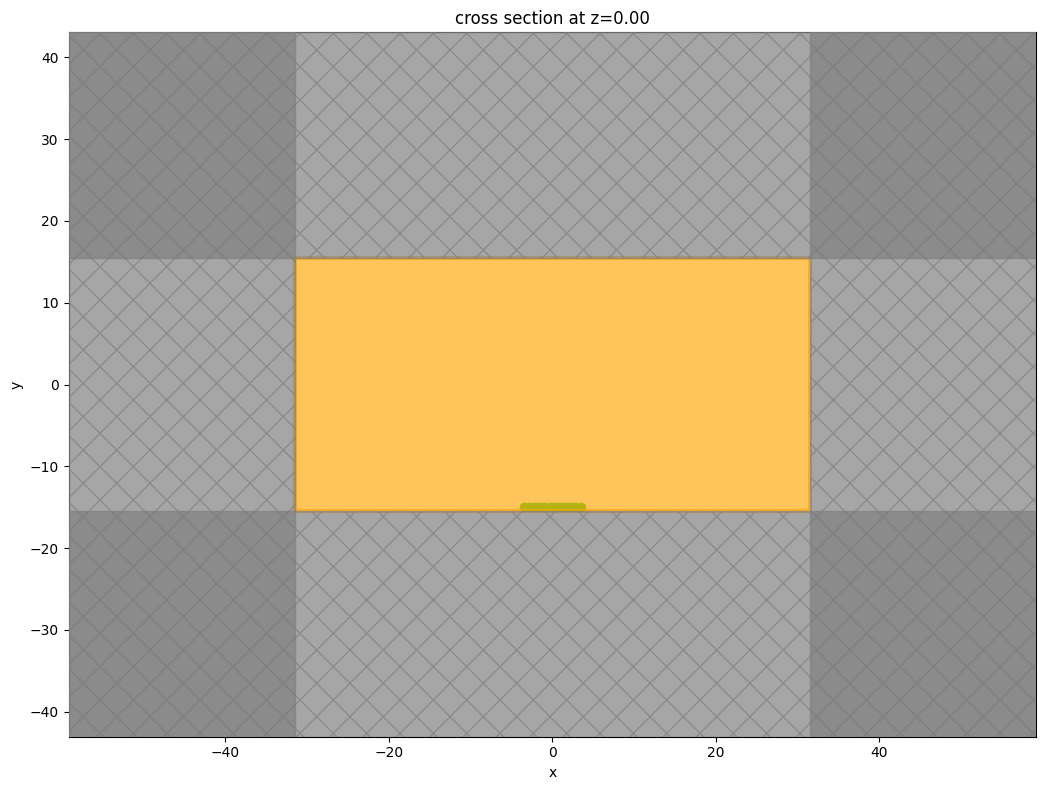

In [7]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(16, 8))
sim.plot(z=0, ax=ax)
plt.show()

In [8]:
web.run(sim,task_name="Antenna Test 2", folder_name=project_name)

14:59:28 W. Europe Standard Time Created task 'Antenna Test 2' with task_id     
                                 'fdve-c453a754-ea24-4d03-a97e-260c90fc56e3' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=470813;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=916975;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\task]8;;\
                                 ]8;id=916975;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\Id]8;;\]8;id=470813;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\=]8;;\]8;id=839836;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\fdve]8;;\]8;id=470813;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\-c453a754-ea24-4d03-a97e-260c90fc56e3']8;;\.

Output()

14:59:32 W. Europe Standard Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

14:59:39 W. Europe Standard Time status = preprocess

14:59:40 W. Europe Standard Time You are running this simulation for FREE. Your 
                                 current plan allows up to 20 free              
                                 non-concurrent simulations per day (under      
                                 100.0M grid points and 50.0K time steps)

                                 starting up solver

                                 running solver

Output()

Output()

15:00:14 W. Europe Standard Time status = postprocess

15:00:35 W. Europe Standard Time status = success

                                 View simulation result at                      
                                 ]8;id=263411;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=920370;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\task]8;;\
                                 ]8;id=920370;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\Id]8;;\]8;id=263411;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\=]8;;\]8;id=748202;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\fdve]8;;\]8;id=263411;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c453a754-ea24-4d03-a97e-260c90fc56e3\-c453a754-ea24-4d03-a97e-260c90fc56e3']8;;\.

Output()

15:00:51 W. Europe Standard Time loading simulation from simulation_data.hdf5

15:00:52 W. Europe Standard Time WARNING: Simulation final field decay value of 
                                 1.02e-15 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

SimulationData(attrs={}, simulation=Simulation(attrs={}, type='Simulation', center=(0.0, 0.0, 0.0), size=(63.0, 31.0, 0.0), medium=Medium(attrs={}, name=None, frequency_range=None, allow_gain=False, nonlinear_spec=None, modulation_spec=None, heat_spec=None, type='Medium', permittivity=1.0, conductivity=0.0), structures=(), symmetry=(0, 0, 0), sources=(PointDipole(attrs={}, name=None, type='PointDipole', center=(-3.4650034650034653, -15.0, 0.0), size=(0, 0, 0), source_time=GaussianPulse(attrs={}, amplitude=0.10335224304587062, phase=0.9096041834284623, type='GaussianPulse', freq0=180740692322373.2, fwidth=66901031379721.555, offset=5.0, remove_dc_component=True), interpolate=True, confine_to_bounds=False, polarization='Ez'), PointDipole(attrs={}, name=None, type='PointDipole', center=(-2.835002835002835, -15.0, 0.0), size=(0, 0, 0), source_time=GaussianPulse(attrs={}, amplitude=0.21885907810705402, phase=0.6089085856008714, type='GaussianPulse', freq0=180740692322373.2, fwidth=669010313

In [9]:
np.array([100,50])*10

array([1000,  500])

In [10]:
10/15.87

0.630119722747322

In [11]:
np.arange(-6,6,1)

array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])